## Outliers: Problem Solving

### Idea:
- give no structure(sub-goals), just the problem description.

## Problem description

For our problem at hand, we have a dataset named boston apartments which has information about houses in the boston area. Our actual goal is to predict the price of an apartment given its features.

Bt as an initial step to building a ML model, we need to check if there are outliers in the price column.

So, using different methods we try to find out the outliers in price data if any.

[only give the problem statement and let the students ccpme up with the solution]

### Step 1: Read the data from source 

As a first step , read the source data from the **boston_apartments.csv** file.

In [6]:
import pandas as pd

house=pd.read_csv("../datasets/boston_apartments.csv")
house

,id,name,host_id,host_since,host_location,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_verifications,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,3781,HARBORSIDE-Walk to subway,4804,12/3/08,Massachusetts,44%,t,East Boston,5,"['email', 'phone', 'reviews']",...,97,16,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0.28
1,8789,Curved Glass Studio/1bd facing Park,26988,7/22/09,"Boston, Massachusetts, United States",83%,t,Beacon Hill,10,"['email', 'phone', 'reviews', 'jumio', 'offlin...",...,290,24,93.0,9.0,9.0,10.0,10.0,10.0,9.0,0.35
2,10730,Bright 1bed facing Golden Dome,26988,7/22/09,"Boston, Massachusetts, United States",83%,t,Beacon Hill,10,"['email', 'phone', 'reviews', 'jumio', 'offlin...",...,42,31,95.0,10.0,9.0,10.0,10.0,10.0,9.0,0.24
3,10813,"Back Bay Apt-blocks to subway, Newbury St, The...",38997,9/16/09,US,15%,f,Back Bay,13,"['email', 'phone', 'reviews', 'jumio', 'offlin...",...,0,80,98.0,10.0,10.0,10.0,10.0,10.0,10.0,2.74
4,16384,Small Room in Cambridge Kendall MIT,23078,6/24/09,"Cambridge, Massachusetts, United States",0%,f,Beacon Hill,3,"['email', 'phone', 'facebook', 'reviews', 'jum...",...,365,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,43148398,Spacious Queen Room in North End,297860058,9/25/19,US,44%,t,Allston-Brighton,1,"['email', 'phone', 'jumio', 'offline_governmen...",...,348,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2409,43154697,"2BD by Waterfront, 10 mins to Downtown",2356643,5/12/12,"Boston, Massachusetts, United States",100%,f,Theater District,10,"['email', 'phone', 'reviews', 'jumio', 'offlin...",...,365,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2410,43162952,波士顿长木医疗区豪华2室公寓3月起租,47921934,11/1/15,"Lexington, Massachusetts, United States",NaN,f,Mission Hill,0,"['email', 'phone', 'reviews', 'jumio', 'selfie...",...,365,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2411,43163112,BRIGHT SPACIOUS BOSTON APARTMENT,136709790,6/24/17,US,NaN,f,Fenway–Kenmore,0,"['email', 'phone', 'jumio', 'offline_governmen...",...,76,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 2: Estimate the outliers in price data.

### What is the outlier estimation in terms of box plot?

- Plot a boxplot to look at the outliers if any.


<details>
  <summary></summary>
 
  house.boxplot(figsize = (10,10), column=['price'], fontsize= '8', grid =True)
  
</details>





### What is the outlier estimation in terms of scatter plot? 

- Q: what is distribution of the `price` in terms of scatterplot?


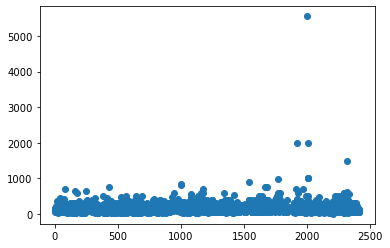

In [7]:
import matplotlib.pyplot as plt

plt.scatter(y= house['price'], x= house.index)
#plt.hist(nyc['price'],20)
plt.show()

- Q: what would be the dependant and independant variables in the plot? [keep separate for last]

Q: from the scatterplot , which data could be roughly the outliers?

### Distribution of the price by numbers?


What is the distribution of price by numbers?

In [8]:

house['price'].describe()

count    2413.000000
mean      169.232076
std       166.794578
min         0.000000
25%        90.000000
50%       149.000000
75%       200.000000
max      5555.000000
Name: price, dtype: float64

## Step 4: Figure out the outliers (using inter quartile range) 

Find out the outliers in the data.
Q. what is the q3 val in `price` data?
Q. what is the iqr for `price`?
Q. which values are actually the outliers?

### Find the first quartile(25%) data range for price 


### Find the third quartile(75%) data range for price 


### What is the  inter quartile range for price ?


### What is the upper and lower bound for outliers in price ?

In [9]:
## Find the first quartile(25%) data range for price 
q1= house['price'].quantile(.25)
print(f"q1: {q1}")

## Find the third quartile(25%) data range for price 
q3= house['price'].quantile(.75)
print(f"q3: {q3}")

## Find the inter quartile range for price data
iqr= q3 - q1
print(f"iqr: {iqr}")

## find the upper and lower bound
upper_bound= q3 + 1.5*iqr
lower_bound= q1 - 1.5*iqr

print("upper bound",upper_bound)
print("lower bound",lower_bound)

q1: 90.0
q3: 200.0
iqr: 110.0
upper bound 365.0
lower bound -75.0


### Find the percentile closest to the upper bound value?

In [10]:
try1=house['price'].quantile(0.95)
try2=house['price'].quantile(0.94)
try3=house['price'].quantile(0.93)

print("95th:",try1,"94th:",try2,"93th:",try3)

95th: 375.0 94th: 330.0 93th: 319.0


## Step 5: Remove the outliers of price

Use clip method to remove the outlier values

In [11]:
house['price']= house['price'].clip(house['price'].quantile(0.00), house['price'].quantile(0.95))

## Step 6: Check the price value distributiom after change 

In [12]:
house['price'].describe()

count    2413.000000
mean      159.131372
std        89.184413
min         0.000000
25%        90.000000
50%       149.000000
75%       200.000000
max       375.000000
Name: price, dtype: float64

In [13]:
### 

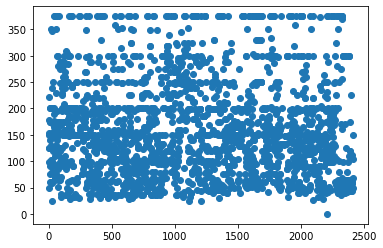

In [14]:

plt.scatter(y= house['price'], x= house.index)
#plt.hist(nyc['price'],20)
plt.show()